## Multi-Layer Perceptron (MLP) Algorithm

A Multi-Layer Perceptron (MLP) is a class of feedforward artificial neural network (ANN). It consists of at least three layers of nodes: an input layer, one or more hidden layers, and an output layer. Each node, or neuron, in one layer connects with a certain weight to every node in the following layer.

### Key Characteristics:
- **Input Layer**: The layer that receives the input signals.
- **Hidden Layers**: Intermediate layers that process inputs received from the input layer. There can be one or more hidden layers.
- **Output Layer**: The layer that produces the final output of the network.

### Activation Function:
MLPs use activation functions to introduce non-linearity into the model. Common activation functions include:
- Sigmoid
- Hyperbolic Tangent (tanh)
- Rectified Linear Unit (ReLU)

### Training:
MLPs are trained using a supervised learning technique called backpropagation. The training process involves the following steps:
1. **Forward Pass**: Input data is passed through the network to generate an output.
2. **Loss Calculation**: The difference between the predicted output and the actual output is calculated using a loss function.
3. **Backward Pass**: The error is propagated back through the network, and the weights are adjusted to minimize the loss.

### Applications:
MLPs are widely used for various tasks, including:
- Classification
- Regression
- Pattern Recognition
- Time Series Prediction

MLPs are powerful models capable of capturing complex patterns in data, making them a fundamental tool in the field of machine learning and artificial intelligence.

In [1]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### Datasets Download

In [2]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
wine = fetch_ucirepo(id=109) 
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
# metadata 
print(wine.metadata) 
# variable information 
print(wine.variables) 

y = y - 1 #djusting the data labels

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(36, 13)
(36, 1)
(142, 13)
(142, 1)


### Defining the Model

In [15]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),  # Hidden layer with 64 neurons
    Dense(len(np.unique(y)), activation='sigmoid')  # Output layer with sigmoid 
])

c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Training the Neural Network

In [17]:
# for given error = 0.01
loss_threshold = 0.01
current_loss = np.inf
history_loss = [] 
epoch = 0

while current_loss > loss_threshold:
    history = model.fit(X_train, y_train, epochs=1, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    current_loss = history.history['loss'][-1]
    history_loss.append(current_loss)
    
    epoch += 1
    print(f"Epoch {epoch}: Loss = {current_loss}")
    if epoch > 2500:
        print("Stopping training: Too many epochs (1000).")
        break

Epoch 1: Loss = 1.2057957649230957
Epoch 2: Loss = 1.1023200750350952
Epoch 3: Loss = 1.048593521118164
Epoch 4: Loss = 1.0133813619613647
Epoch 5: Loss = 0.9876766204833984
Epoch 6: Loss = 0.9625873565673828
Epoch 7: Loss = 0.9417498111724854
Epoch 8: Loss = 0.9195992946624756
Epoch 9: Loss = 0.8984607458114624
Epoch 10: Loss = 0.877737820148468
Epoch 11: Loss = 0.8579384088516235
Epoch 12: Loss = 0.8399328589439392
Epoch 13: Loss = 0.8217068314552307
Epoch 14: Loss = 0.803673505783081
Epoch 15: Loss = 0.7861014604568481
Epoch 16: Loss = 0.770386278629303
Epoch 17: Loss = 0.7537187337875366
Epoch 18: Loss = 0.7365949153900146
Epoch 19: Loss = 0.7229703068733215
Epoch 20: Loss = 0.7085148096084595
Epoch 21: Loss = 0.6915870904922485
Epoch 22: Loss = 0.6794446110725403
Epoch 23: Loss = 0.6651058197021484
Epoch 24: Loss = 0.6512544751167297
Epoch 25: Loss = 0.6383345723152161
Epoch 26: Loss = 0.6262351274490356
Epoch 27: Loss = 0.6151538491249084
Epoch 28: Loss = 0.6026705503463745
Epoch

## Trained Weights

In [18]:
weights = model.get_weights()
print("Trained Weights:", weights)

Trained Weights: [array([[-3.81403208e-01,  3.20180982e-01, -4.97692525e-01,
         2.09676951e-01, -4.78471488e-01,  1.78489313e-01,
         3.81320655e-01,  2.15629548e-01, -5.53641737e-01,
         3.74807477e-01,  2.54618376e-02,  5.13796210e-01,
         5.15457749e-01, -3.97597075e-01, -2.41416320e-01,
        -4.56988603e-01, -1.83791801e-01,  1.88315734e-01,
        -3.20587516e-01, -2.06426218e-01, -1.66970104e-01,
         1.02806970e-01,  2.14408547e-01,  6.30166307e-02,
         2.79172421e-01,  4.27717805e-01, -3.57796848e-01,
         9.99973118e-02,  1.59624264e-01,  1.81073099e-02,
        -4.54008467e-02, -6.45977855e-02,  3.89631063e-01,
        -3.00761908e-01, -8.37756842e-02,  2.06937566e-01,
        -4.87579256e-01, -4.18103598e-02, -3.90485823e-02,
         3.38048577e-01,  1.36853889e-01, -3.78688037e-01,
         7.40924031e-02, -1.76310316e-01,  1.12033963e-01,
        -2.52652645e-01,  2.78174549e-01,  3.64817142e-01,
         7.62693584e-02,  1.67637125e-

## Plotting the Error vs Epoch graph

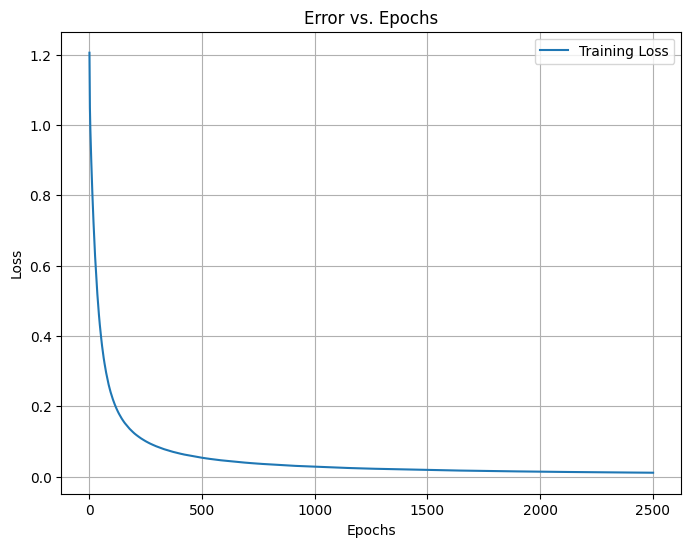

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(history_loss) + 1), history_loss, label='Training Loss')
plt.title('Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Calculating the accuracy on test data

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.4f}")

Test Accuracy: 100.0000
